# What are highest ranking articles by traversal funnels?

metric: **traversal funnels**

the number of paths an article directs towards a cycle or invalid link

In [1]:
from collections import defaultdict

import pandas as pd
from scipy import stats 
import numpy as np
import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

results_path = "/Users/mark/Desktop/wiki_v4/"
path = "/Users/mark/Dropbox/Math/Complex_Systems/research/wikipedia-network/paper/writeup/graphics/"

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#load feeder data
with open(results_path + "feed_count.json") as f:
    feeder_dict = json.load(f)
feeder_df = pd.DataFrame(feeder_dict.items())
feeder_df.columns = ['article', 'traversal funnels']
feeder_df = feeder_df.sort(columns=['traversal funnels'], ascending=False)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [3]:
feeder_df.head(50)

,article,traversal funnels
7948850,Philosophy,7374892
224026,Presentation,30799
9030902,Tree of life (biology),29274
1344349,Southeast Europe,25745
11029885,Feudalism,19276
632584,Census-Designated Place,17483
7652704,United States Constitution,13952
7974918,Reality,13416
8629119,Health care,10762
7739754,BBC,8945


## Articles with no traversal funnels

In [5]:
feeder_df.tail(20)

,article,traversal funnels
3762162,Galge,0
3762180,Suriyan,0
3762163,Craig Hall,0
3762164,Anthony holborne,0
3762165,Dartmouth Chronicle and Advertiser,0
3762166,Cryptothele,0
3762167,Fishers Pond,0
3762168,"Cabannes, Bouches-du-Rhone",0
3762169,Galgo,0
3762170,Gymnastics at the 1960 Summer Olympics – Men's...,0


# What's the distribution of traversal funnels?

In [6]:
feeder_df.describe()

,traversal funnels
count,11277534.000000
mean,0.692524
std,2196.166545
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,7374892.000000


## How many articles have more than one traversal funnel?

In [7]:
feeder_df[feeder_df['traversal funnels'] > 0].count()

article              17821
traversal funnels    17821
dtype: int64

## What's the distribution of nonzero traversal funnels?

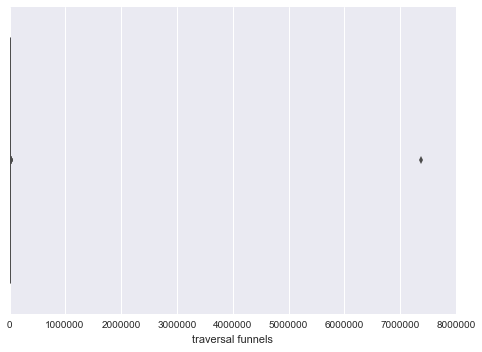

In [8]:
sns.boxplot(x='traversal funnels', data=feeder_df[feeder_df['traversal funnels'] > 0])

extreme outlier is philosophy

# log scale

In [4]:
feeder_df['rank'] = np.arange(1, feeder_df.shape[0]+1)
feeder_df['log(rank)'] = np.log10(feeder_df['rank'])
feeder_df['log(traversal funnels)']=  np.log10(feeder_df['traversal funnels']+1)

## Top Articles (on log scale)

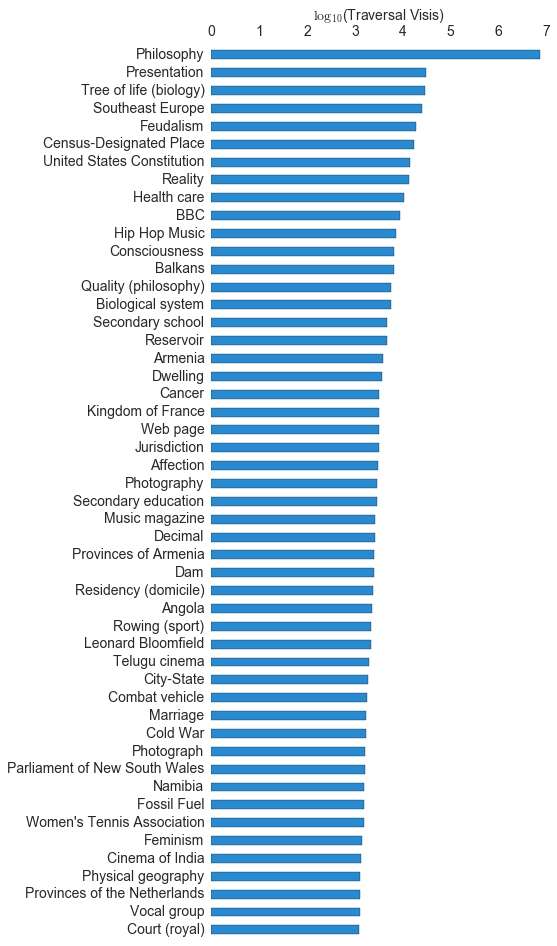

In [7]:
feeder_df.head(50).iloc[::-1].plot(x="article", y="log(traversal funnels)", kind="barh", fontsize=14,
                            legend=False, figsize=(6,16), color="#268bd2")
#no background
ax = plt.gca()
ax.patch.set_visible(False) 


plt.xlabel("$\log_{10}$(Traversal Visis)", fontsize=14)
plt.ylabel("")
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

plt.tick_params(axis='x', which='major', labelsize=14)

#save figure
plt.savefig(path+'top_funnels.png', format='png', dpi=300, bbox_inches='tight')

## Distribution (log-log)

In [ ]:
plt.scatter(feeder_df['log(rank)'], feeder_df['log(traversal funnels)'], color="#87CEFA")
plt.title("Distribution of Traversal Funnels")
plt.xlabel("log(rank)")
plt.ylabel("log(traversal funnels)")
plt.legend()

### Two regimes appear

## Fit for log(rank) < 4

In [5]:
feeder_df[feeder_df["log(rank)"] < 4]

,article,traversal funnels,rank,log(rank),log(traversal funnels)
7948850,Philosophy,7374892,1,0.000000,6.867756
224026,Presentation,30799,2,0.301030,4.488551
9030902,Tree of life (biology),29274,3,0.477121,4.466497
1344349,Southeast Europe,25745,4,0.602060,4.410710
11029885,Feudalism,19276,5,0.698970,4.285039
632584,Census-Designated Place,17483,6,0.778151,4.242641
7652704,United States Constitution,13952,7,0.845098,4.144668
7974918,Reality,13416,8,0.903090,4.127655
8629119,Health care,10762,9,0.954243,4.031933
7739754,BBC,8945,10,1.000000,3.951629


In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(feeder_df[:8103]["log(rank)"], 
                                                               feeder_df[:8103]["log(traversal funnels)"])
print slope, intercept, r_value, p_value, std_err 

-1.08410279645 4.64007221841 -0.990266116712 0.0 0.00169296457747


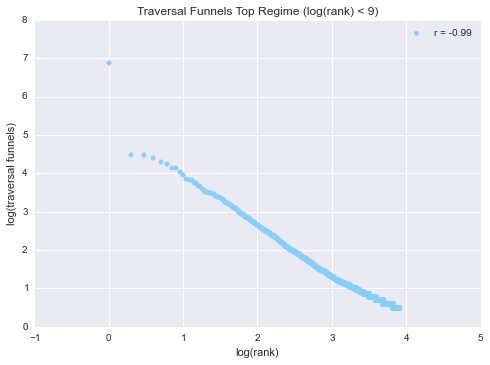

In [6]:
plt.scatter(feeder_df['log(rank)'][:8103], feeder_df['log(traversal funnels)'][:8103], color="#87CEFA", label='r = -0.99')
plt.title("Traversal Funnels Top Regime (log(rank) < 9)")
plt.xlabel("log(rank)")
plt.ylabel("log(traversal funnels)")
plt.legend()

### Power-law exponent for top regime is -1.084

### combined plots of distribution

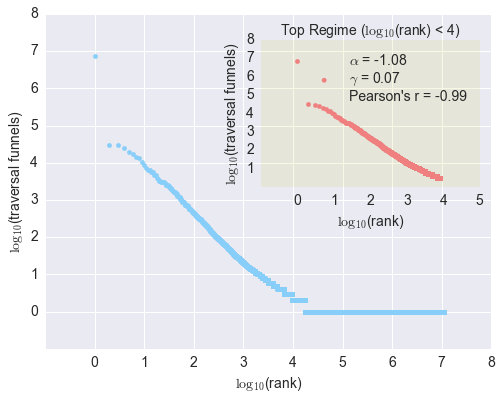

In [8]:
#defaults
sns.set()
plt.figure(figsize=(8,6))

plt.scatter(feeder_df['log(rank)'], feeder_df['log(traversal funnels)'], color="#87CEFA")
plt.xlabel("$\log_{10}$(rank)", fontsize=14)
plt.ylabel("$\log_{10}$(traversal funnels)", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend()
ax = plt.gca()
ax.legend().set_visible(False)

#define plot axis limits
axes = plt.gca()
xticks = axes.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
yticks = axes.yaxis.get_major_ticks()
yticks[0].label1.set_visible(False)

sns.set_style("dark")
#subplot in top corner
a = plt.axes([.50, .50, .38, .34], axisbg='y')
a.scatter(feeder_df['log(rank)'][:8103], feeder_df['log(traversal funnels)'][:8103], color="#F08080",
          label=r"$\alpha$ = -1.08"+"\n$\gamma$ = 0.07\n"+"Pearson\'s r = -0.99")
plt.legend(fontsize=14)
plt.title("Top Regime ($\log_{10}$(rank) < 4)", fontsize=14)
plt.xlabel("$\log_{10}$(rank)", fontsize=14)
plt.ylabel("$\log_{10}$(traversal funnels)", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
#transparent
a.patch.set_alpha(0.1)

#define plot axis limits
axes = plt.gca()
xticks = axes.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
yticks = axes.yaxis.get_major_ticks()
yticks[0].label1.set_visible(False)

#save figure
plt.savefig(path+'funnels_distribution.png', format='png', dpi=300, bbox_inches='tight')

#back to defaults
sns.set()
